# Aprendizagem Estatística - Classificação


### Exercício:

**Utilize a base pima-indians-diabetes.data.csv**

Implemente um classificador binário (SGD) para identificar a qual grupo (Class) pertence 0 ou 1.  

* pregnancies - Number of times pregnant
* Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure - Diastolic blood pressure (mm Hg)
* SkinThickness - Triceps skin fold thickness (mm)
* Insulin - 2-Hour serum insulin (mu U/ml)
* BMI - Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age - Age (years)
* Outcome - Class variable (0 or 1) class value 1 is interpreted as "tested positive for diabetes

Sobre a base de dados:

* The database contains only data about female patients who are of Pima Indian heritage are 21 or older
* All the attributes are numeric
* The data may contain invalid or null values
* Total number of cases presented are 786

Mostre a acurácia, a matriz de confusão de cada classificador, precisão, recall e f1 score

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

In [94]:
# criei essa função para automatizar a preparação das colunas de um df para regressão

import analise_exploratoria as ae

In [3]:
df = pd.read_csv("pima-indians-diabetes.data.csv")
df.sample(5).T

,185,177,741,390,154
Pregnancies,7.000,0.000,3.0,1.000,8.000
Glucose,194.000,129.000,102.0,100.000,188.000
BloodPressure,68.000,110.000,44.0,66.000,78.000
SkinThickness,28.000,46.000,20.0,29.000,0.000
Insulin,0.000,130.000,94.0,196.000,0.000
BMI,35.900,67.100,30.8,32.000,47.900
DiabetesPedigreeFunction,0.745,0.319,0.4,0.444,0.137
Age,41.000,26.000,26.0,42.000,43.000
Class,1.000,1.000,0.0,0.000,1.000


***********************************************
Dados extraídos com sucesso
X:  Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI | DiabetesPedigreeFunction | Age
y:  Class
M:  (768, 8) | (768, 1)
***********************************************


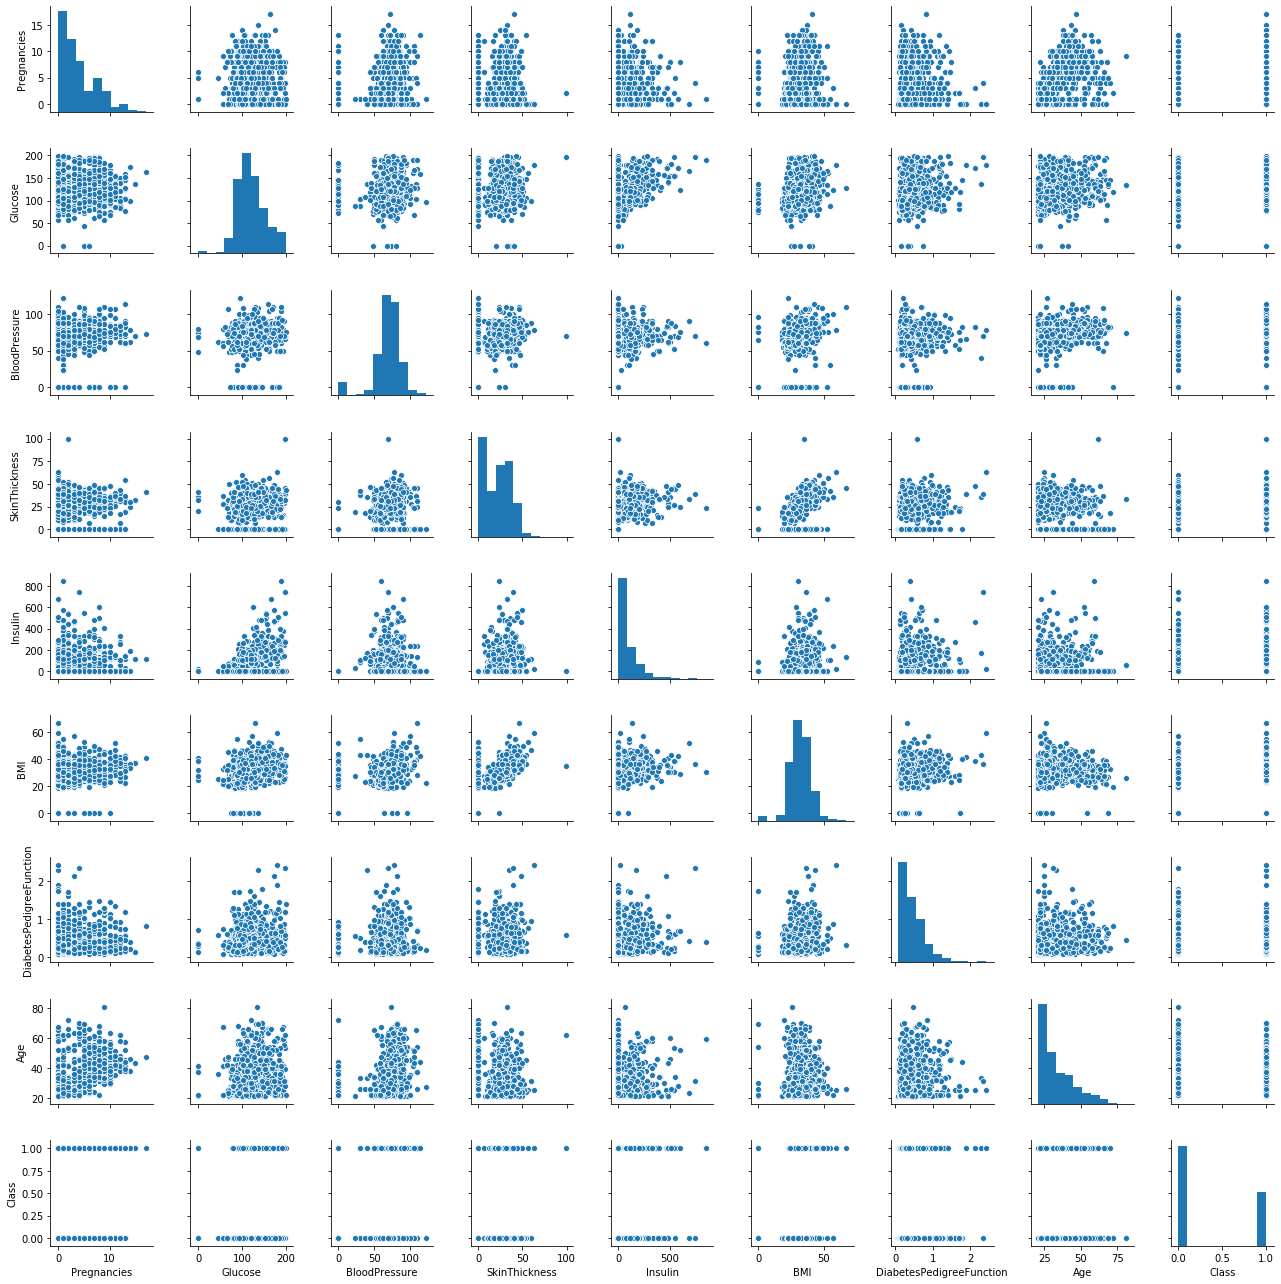

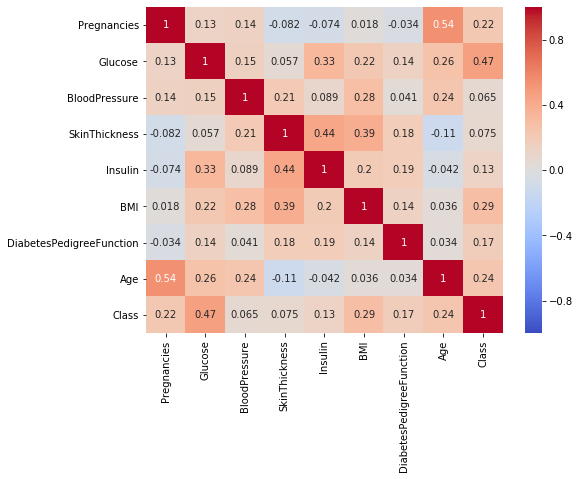

In [4]:
y_cols = ['Class']
ig_cols = []

X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, graph=True)

In [5]:
# da análise gráfica acima, identificamos que algumas variáveis possuem quantidade significativa de valores zerados
#  vamos marcar estes valores no conjunto de dados

df['NullBMI'] = 0
df['NullInsulin'] = 0
df['NullBloodPressure'] = 0
df['NullSkinThickness'] = 0
df['NullGlucose'] = 0

df.loc[df['BMI'] == 0, 'NullBMI'] = 1
df.loc[df['Insulin'] == 0, 'NullInsulin'] = 1
df.loc[df['BloodPressure'] == 0, 'NullBloodPressure'] = 1
df.loc[df['SkinThickness'] == 0, 'NullSkinThickness'] = 1
df.loc[df['Glucose'] == 0, 'NullGlucose'] = 1

In [6]:
# também observamos que a dimensão dos diferentes preditores é diversificada, portanto, é prudente normalizar os dados

X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, graph=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train)

Xt_train = scaler.transform(X_train)
Xt_test = scaler.transform(X_test)

***********************************************
Dados extraídos com sucesso
X:  Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI | DiabetesPedigreeFunction | Age | NullBMI | NullInsulin | NullBloodPressure | NullSkinThickness | NullGlucose
y:  Class
M:  (768, 13) | (768, 1)
***********************************************


In [21]:
sgd_clf = SGDClassifier(random_state=42, max_iter=10000)
sgd_clf.fit(X_train, y_train.values.ravel())

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
for i in range(10):

    sgd_clf = SGDClassifier(max_iter=10000, validation_fraction=0.2)
    sgd_clf.fit(X_train, y_train.values.ravel())

    y_pred = sgd_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    print(classification_report(y_test, y_pred))

    print("Accuracy Score", accuracy_score(y_test, y_pred)*100)

    print("f1-score", f1_score(y_test, y_pred))

[[90 14]
 [36 14]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       104
           1       0.50      0.28      0.36        50

    accuracy                           0.68       154
   macro avg       0.61      0.57      0.57       154
weighted avg       0.64      0.68      0.65       154

Accuracy Score 67.53246753246754
f1-score 0.358974358974359
[[97  7]
 [36 14]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       104
           1       0.67      0.28      0.39        50

    accuracy                           0.72       154
   macro avg       0.70      0.61      0.61       154
weighted avg       0.71      0.72      0.68       154

Accuracy Score 72.07792207792207
f1-score 0.3943661971830986
[[100   4]
 [ 42   8]]
              precision    recall  f1-score   support

           0       0.70      0.96      0.81       104
           1       0.67      0.16      0.26        50



### os resultados acima não estão legais, vamos ter que mexer um pouco mais 

In [110]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb, BernoulliNB as bnb, MultinomialNB as mnb
from sklearn.linear_model import SGDClassifier as sgd, LogisticRegression as logit
from sklearn.ensemble import RandomForestClassifier as rfc, GradientBoostingClassifier as gbc

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.metrics import accuracy_score, confusion_matrix

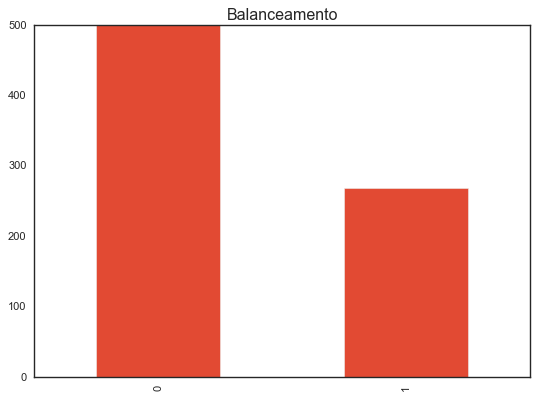

In [146]:
plt.style.use(['seaborn', 'ggplot', 'seaborn-white'])

df['Class'].value_counts().plot(kind='bar').set_title('Balanceamento')
plt.show()

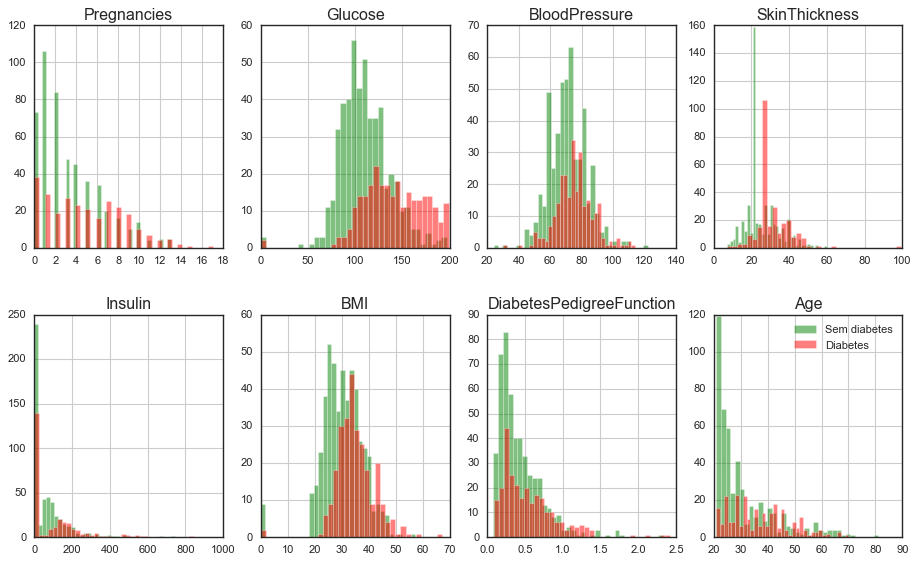

In [147]:
COLS = 4
ROWS = len(X.columns) // COLS + (1 if len(X.columns) % COLS != 0 else 0)
fig, ax = plt.subplots(ROWS, COLS, figsize=(14, 4 * ROWS))
row, col = 0, 0
for i, feature in enumerate(X.columns):
    if col == COLS - 1:
        row += 1
    col = i % COLS    
    df[df.Class==0][feature].hist(bins=35, color='green', alpha=0.5, edgecolor='white', ax=ax[row, col]).set_title(feature)
    df[df.Class==1][feature].hist(bins=35, color='red', alpha=0.5, edgecolor='white', ax=ax[row, col])
    
plt.legend(['Sem diabetes', 'Diabetes'])    
plt.subplots_adjust(hspace=0.3)
plt.show()

In [130]:
# considerando que o número de valores zerados para BloodPressure e SkinThickness é alto, vamos tratá-los

mediana_bp_s = df[df.Class==0]['BloodPressure'].median()
mediana_bp_c = df[df.Class==1]['BloodPressure'].median()

df.loc[(df.BloodPressure==0)&(df.Class==0), 'BloodPressure'] = mediana_bp_s
df.loc[(df.BloodPressure==0)&(df.Class==1), 'BloodPressure'] = mediana_bp_c

mediana_st_s = df[df.Class==0]['SkinThickness'].median()
mediana_st_c = df[df.Class==1]['SkinThickness'].median()

df.loc[(df.SkinThickness==0)&(df.Class==0), 'SkinThickness'] = mediana_st_s
df.loc[(df.SkinThickness==0)&(df.Class==1), 'SkinThickness'] = mediana_st_c

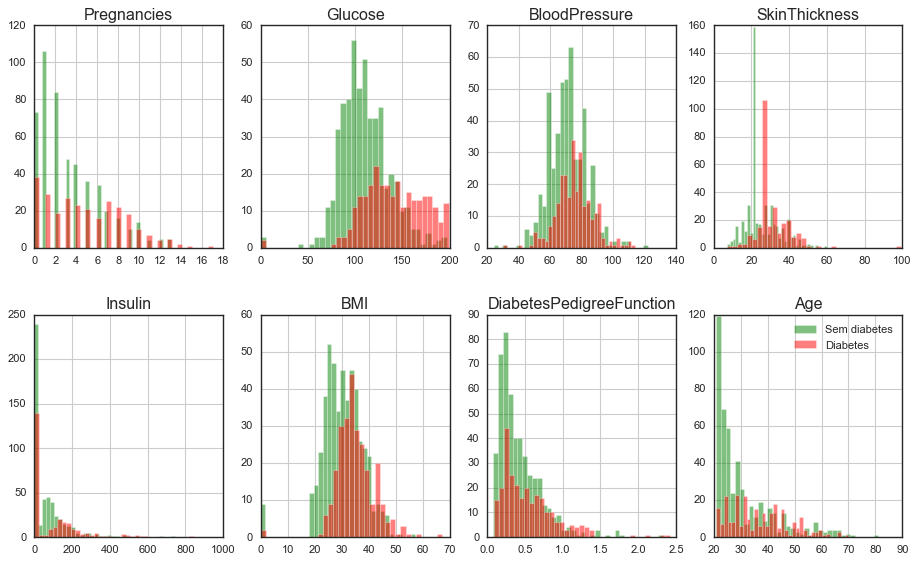

In [148]:
# como ficou após tratamento dos dados ausentes

COLS = 4
ROWS = len(X.columns) // COLS + (1 if len(X.columns) % COLS != 0 else 0)
fig, ax = plt.subplots(ROWS, COLS, figsize=(14, 4 * ROWS))
row, col = 0, 0
for i, feature in enumerate(X.columns):
    if col == COLS - 1:
        row += 1
    col = i % COLS    
    df[df.Class==0][feature].hist(bins=35, color='green', alpha=0.5, edgecolor='white', ax=ax[row, col]).set_title(feature)
    df[df.Class==1][feature].hist(bins=35, color='red', alpha=0.5, edgecolor='white', ax=ax[row, col])
    
plt.legend(['Sem diabetes', 'Diabetes'])    
plt.subplots_adjust(hspace=0.3)
plt.show()

In [133]:
# considerando que o número de valores zerados para BloodPressure, BMI e Glucose é pequeno, vamos testar ignorá-los
y_cols = ['Class']
ig_cols = ['NullBMI', 'NullInsulin', 'NullBloodPressure', 'NullSkinThickness', 'NullGlucose']

data_mod = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]

X, y, M = ae.analise_exploratoria(data_mod, y_cols, ig_cols, graph=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)

Xt_train = scaler.transform(X_train)
Xt_test = scaler.transform(X_test)

***********************************************
Dados extraídos com sucesso
X:  Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI | DiabetesPedigreeFunction | Age
y:  Class
M:  (752, 8) | (752, 1)
***********************************************


In [134]:
# vamos adicionar outros classificadores e comparar o desempenho de cada um deles

classifiers = [
    knnc(),
    dtc(),
    logit(),
    SVC(gamma='scale'),
    SVC(kernel='linear'),
    gnb(),
    bnb(),
    mnb(),
    sgd(),
    rfc(n_estimators=100),
    gbc()
]
classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'Logistic regression',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes',
    'Bernoulli Naive Bayes',
    'Multinomial Naive Bayes',
    'SGD classifier',
    'Random forest classifier',
    'Gradient boosting classifier'
]

K nearest neighbors  mean accuracy:  77.66 % std:  0.41 %
Decision Tree Classifier  mean accuracy:  73.18 % std:  0.44 %
Logistic regression  mean accuracy:  75.48 % std:  0.76 %
SVM classifier with RBF kernel  mean accuracy:  75.49 % std:  0.39 %
SVM classifier with linear kernel  mean accuracy:  74.4 % std:  0.64 %
Gaussian Naive Bayes  mean accuracy:  74.45 % std:  0.49 %
Bernoulli Naive Bayes  mean accuracy:  70.82 % std:  0.74 %
Multinomial Naive Bayes  mean accuracy:  nan % std:  nan %
SGD classifier  mean accuracy:  72.38 % std:  0.8 %
Random forest classifier  mean accuracy:  80.79 % std:  0.55 %
Gradient boosting classifier  mean accuracy:  81.98 % std:  0.23 %


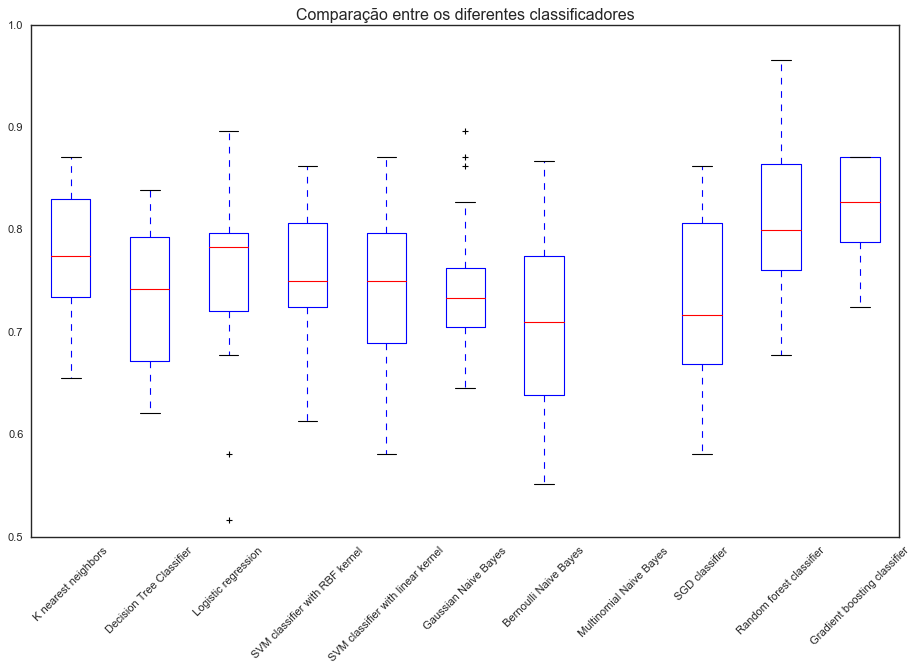

In [149]:
# vamos usar cross-validation para avaliar melhor o desempenho de cada modelo

import warnings
warnings.filterwarnings("ignore")

kf = StratifiedKFold(n_splits=20, shuffle=True)

results = []
names = []

for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, Xt_train, y_train.values.ravel(), cv=kf, error_score=np.nan)  
    results.append(cv_scores)
    names.append(clf_name)
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 2), '% std: ', round(cv_scores.var()*100, 2),'%')
    
fig = plt.figure(figsize=(14, 8))
plt.title('Comparação entre os diferentes classificadores')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.0)
plt.show()

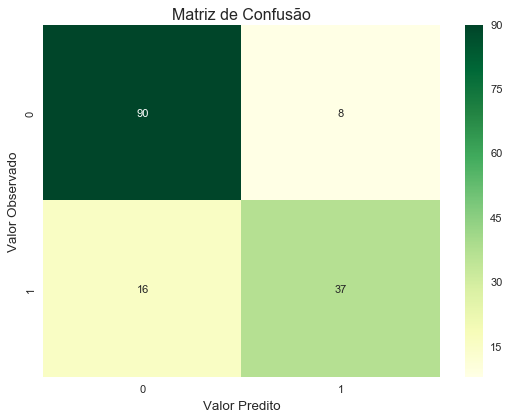

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        98
           1       0.82      0.70      0.76        53

    accuracy                           0.84       151
   macro avg       0.84      0.81      0.82       151
weighted avg       0.84      0.84      0.84       151

Acurácia 84.11
f1-score 75.51


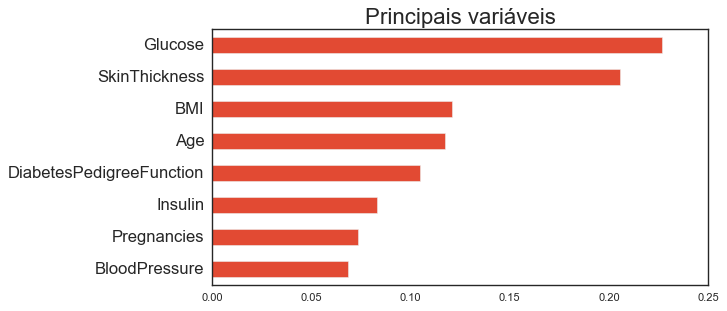

In [150]:
final_model = rfc(n_estimators=100).fit(Xt_train, y_train.values.ravel())
y_pred = final_model.predict(Xt_test)

plt.title('Matriz de Confusão')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGn")
plt.xlabel('Valor Predito')
plt.ylabel('Valor Observado')
plt.show()

print(classification_report(y_test, y_pred))

print("Acurácia", round(accuracy_score(y_test, y_pred)*100, 2))

print("f1-score", round(100 * f1_score(y_test, y_pred), 2))

(pd.Series(final_model.feature_importances_, index=X.columns)
    .nlargest(8)
    .plot(kind='barh', figsize=[8,4])
    .invert_yaxis())
plt.yticks(size=15)
plt.title('Principais variáveis', size=20)
plt.show()

In [ ]:
# conseguimos uma melhora bastante expressiva na acurácia e no f1 após realizar estes tratamentos